# Chooser option valuation project 
## name: Ahmed Elbelabsy
## chair : Financial Engineering
## Matriculation number :224644 


In [4]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import datetime as dt
from scipy.stats import norm

In [6]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime( 2021, 6, 30)
dates=pd.bdate_range(start =start ,end = end)
data = pdr.get_data_yahoo("ADS.DE", start , end  )


In [51]:
data.shape

(1392, 6)

In [52]:
data['date'] = data.index

In [53]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'date'], dtype='object')

In [54]:
data.reset_index()


,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2016-01-04,88.260002,86.089996,88.120003,87.540001,1266864.0,79.457558,2016-01-04
1,2016-01-05,88.989998,86.540001,88.410004,87.239998,699633.0,79.185257,2016-01-05
2,2016-01-06,86.690002,85.099998,86.690002,86.230003,918625.0,78.268517,2016-01-06
3,2016-01-07,85.330002,83.230003,84.000000,84.889999,1233896.0,77.052231,2016-01-07
4,2016-01-08,85.489998,83.339996,84.980003,83.449997,1154585.0,75.745178,2016-01-08
...,...,...,...,...,...,...,...,...
1387,2021-06-24,293.799988,291.250000,293.000000,292.500000,407240.0,292.500000,2021-06-24
1388,2021-06-25,311.350006,299.200012,301.250000,311.350006,1216270.0,311.350006,2021-06-25
1389,2021-06-28,312.600006,308.750000,311.000000,309.850006,422860.0,309.850006,2021-06-28
1390,2021-06-29,319.149994,309.500000,309.549988,317.500000,596054.0,317.500000,2021-06-29


In [ ]:
adidas=data ['Adj Close']

In [56]:
adidas

Date
2016-01-04     79.457558
2016-01-05     79.185257
2016-01-06     78.268517
2016-01-07     77.052231
2016-01-08     75.745178
                 ...    
2021-06-24    292.500000
2021-06-25    311.350006
2021-06-28    309.850006
2021-06-29    317.500000
2021-06-30    313.899994
Name: Adj Close, Length: 1392, dtype: float64

<IPython.core.display.Javascript object>


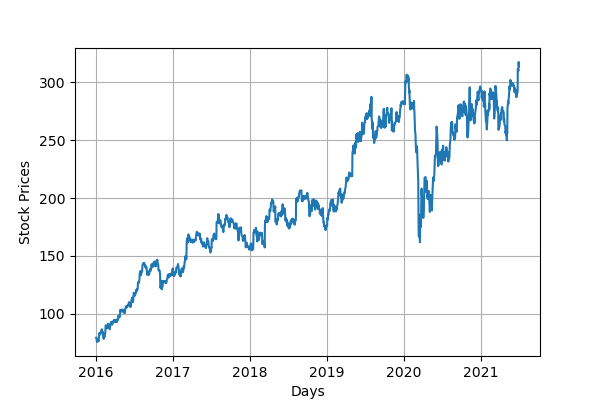

In [57]:
#adidas.plot()
plt.figure(figsize = (6,4))
plt.plot(adidas)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.show()

# We first use adidas five years (2016: 2020) stock prices to make predictions for the first 6 months of 2021
##### We want to test how efficient the Discrete-time Geometric Brownian Motion is in predicting the first 6 months of 2021 adidas stock price. We retrieve the five years historical data and apply the GBM. Thereafter, we will makea plot to visualize the error between the predicted first 6 months of 2021  stock price and the actual  first 6 months of 2021 stockprice. This will help us understand that the descrete-time GBM isn't a perfect stock price prediction tool. Though it is helful in giving us insights on the possible paths that the stock price can follow

# Geometric Brownian Motion (GBM) Parameter Definitions

### The following are the notations for GBM that will be used throughout this study: So : initial stock price;d_t : Time increment (we will use a day in our case); T : Prediction time length(Prediction time points); N : Prediction time points (given by T/dt); t : Prediiction time points array for example [1, 2, 3, .. , N] ; mu : Mean daily returns; sigma : standard deviation daily returns; b : Brownian increments arrays; W : Brownian path array;

In [58]:
fiveyears_data = pd.DataFrame(data.loc[data['date'].between('2016-01-01','2020-12-31')])
fiveyears_data.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2016-01-04,88.260002,86.089996,88.120003,87.540001,1266864.0,79.457558,2016-01-04
1,2016-01-05,88.989998,86.540001,88.410004,87.239998,699633.0,79.185257,2016-01-05
2,2016-01-06,86.690002,85.099998,86.690002,86.230003,918625.0,78.268517,2016-01-06
3,2016-01-07,85.330002,83.230003,84.000000,84.889999,1233896.0,77.052231,2016-01-07
4,2016-01-08,85.489998,83.339996,84.980003,83.449997,1154585.0,75.745178,2016-01-08
...,...,...,...,...,...,...,...,...
1262,2020-12-22,293.500000,288.100006,289.799988,293.500000,361682.0,290.427246,2020-12-22
1263,2020-12-23,294.299988,290.500000,293.700012,293.600006,233813.0,290.526184,2020-12-23
1264,2020-12-28,299.299988,295.200012,297.000000,299.299988,291816.0,296.166504,2020-12-28
1265,2020-12-29,302.700012,298.600006,301.100006,299.500000,308570.0,296.364410,2020-12-29


In [59]:
fiveyears_data.shape

(1267, 7)

##  We will use the initial stock price (So) as the closing stock price on December 30 2020.

In [ ]:
fiveyears_data.shape[0] #locating the row with the June 30 closing stock price

In [61]:
fiveyears_data.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2016-01-04,88.260002,86.089996,88.120003,87.540001,1266864.0,79.457558,2016-01-04
1,2016-01-05,88.989998,86.540001,88.410004,87.239998,699633.0,79.185257,2016-01-05
2,2016-01-06,86.690002,85.099998,86.690002,86.230003,918625.0,78.268517,2016-01-06
3,2016-01-07,85.330002,83.230003,84.000000,84.889999,1233896.0,77.052231,2016-01-07
4,2016-01-08,85.489998,83.339996,84.980003,83.449997,1154585.0,75.745178,2016-01-08
...,...,...,...,...,...,...,...,...
1262,2020-12-22,293.500000,288.100006,289.799988,293.500000,361682.0,290.427246,2020-12-22
1263,2020-12-23,294.299988,290.500000,293.700012,293.600006,233813.0,290.526184,2020-12-23
1264,2020-12-28,299.299988,295.200012,297.000000,299.299988,291816.0,296.166504,2020-12-28
1265,2020-12-29,302.700012,298.600006,301.100006,299.500000,308570.0,296.364410,2020-12-29


In [62]:
fiveyears_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'date'], dtype='object')

In [86]:
So = fiveyears_data ['Adj Close'].iloc[1266]
#[0] is used to index axis 0i.e rows
print(So)


294.7811584472656


# d_t is the model's time increment. It is represented in days. The daily closing prices of adidas stockshare used thus the model time increment is 1 day

In [65]:
d_t = 1
print(d_t)

1


# T denotes the prediction time horizon length. We use the 5 year(2016:2020)  data to predict the first 6 months of 2021 stock price.

In [66]:
T=np.busday_count('2021-01-01', '2021-06-30')
T

128

In [67]:
N = T/d_t
print(N)


128.0


## t is an array that will start from 1 until 130. This is interpreted as: one day in historical data translates to one day in predictions.


In [68]:
 t = np.arange(1, int(N) + 1)
print(t)


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18

  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36

  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54

  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72

  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90

  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108

 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126

 127 128]


## mu is the mean daily returns based on the selected historical data. rk=(Sk - Sk_1)/(Sk_1) ;where k istime period , Sk is stock period at time k and Sk_1 is stock price after applying one day lag.

In [92]:
returns = (fiveyears_data ['Adj Close'].iloc[0:1265]- fiveyears_data['Adj Close'].shift(1).iloc[0:1265]) /fiveyears_data['Adj Close'].shift(1).iloc[0:1265]
print(returns)


Date

2016-01-04         NaN

2016-01-05   -0.003427

2016-01-06   -0.011577

2016-01-07   -0.015540

2016-01-08   -0.016963

                ...   

2020-12-18   -0.017288

2020-12-21   -0.008279

2020-12-22    0.020870

2020-12-23    0.000341

2020-12-28    0.019414

Name: Adj Close, Length: 1265, dtype: float64


## Just to visualize what happens when a one day lag is applied.

In [70]:
fiveyears_data['Adj Close'].shift(1).iloc[0:]


Date
2016-01-04           NaN
2016-01-05     79.457558
2016-01-06     79.185257
2016-01-07     78.268517
2016-01-08     77.052231
                 ...    
2020-12-22    284.490051
2020-12-23    290.427246
2020-12-28    290.526184
2020-12-29    296.166504
2020-12-30    296.364410
Name: Adj Close, Length: 1267, dtype: float64

### Next, to obtain μ we need to calculate the arithmetic average of the returns. It will used thereafter in the models drift component. μ =(1/(|k|))*Σ(rk) From below, the 5 years   has positive return on average which will be taken into account when calculating the first 6 months of 2021  predictions.

In [93]:
mu = np.mean(returns)
print(mu)

0.0012127181707233025


### Sigma represents the five years returns standard deviation. It helps to incorporate random shocks into the first 6 months of 2021  predictions. Sigma determines the random shocks' magnitude. On its own Sigma doesn't add required randomness thus standard normal variable is used in picking random values. Thus the contribution of sigma is on scaling the magnitude of random shock to ensure that they occur in accordance with the historical stock prices volatility.


In [94]:
sigma = np.std(returns)
print(sigma)


0.018529348188129437


### The array b adds randomness to the model since it stores the random numbers generated from thestandard normal distribution.
### The numpy.random.normal() will be used to generate random values from the standard normal distribution. In the model, two arrays with length 14 will be created to depict two different scenarios
### that the stock prices can take.


In [95]:
#generalizing the idea on developing random shocks
shocks=np.random.normal(0, 1, int(N))
shocks

array([ 0.93632474, -0.09916715,  0.9035197 ,  0.80728235, -1.72386137,
       -0.67237071,  1.34083092, -1.05746023, -0.89173515, -0.49852917,
       -0.3791189 , -0.04346936,  0.42245263, -0.2128889 ,  0.6827516 ,
       -0.54130619, -0.01974243, -0.62067207,  1.26782182,  0.23112766,
       -0.61777752,  0.7659868 , -1.46806199, -0.20429138,  2.20570864,
        2.08209516, -0.01115224, -0.73224376, -0.27876251, -1.11652921,
       -0.41748872,  0.7732638 ,  1.53988559,  1.05773516, -1.03597209,
        0.83027912,  1.33891144,  1.54625373,  1.3169679 , -0.31275123,
       -0.16984396,  0.31746381, -1.11707135, -0.64385849,  1.13401174,
        0.50623323, -1.07354035,  0.30017747, -0.99553179, -0.60122013,
       -1.03413825, -0.14515606, -1.00272892, -0.95097404, -0.45469699,
       -0.04416424,  0.6719819 ,  1.06815282,  0.44857995, -1.36367323,
       -0.49913958,  0.08273714, -1.00771076,  0.8832323 , -0.39548777,
        0.92873948,  1.69809561,  0.03889347, -0.72208195,  0.76

In [96]:
#generate two sets of shocks and combine them into one code
times=2
b={str(num_times): np.random.normal(0, 1, int(N)) for num_times in range(1, times + 1)}

In [97]:
b

{'1': array([ 0.00824947, -1.97061516, -0.7123258 , -0.28811893,  0.89474783,
         1.25538879, -0.12070221,  0.50441119,  0.66516792,  0.11434766,
         0.25726054, -2.15547569,  0.48087913, -0.04804873, -0.74578979,
        -1.71043554, -0.52681566, -0.75627605,  0.05388916, -0.53381891,
        -0.77067906, -1.02732294, -1.18342795,  0.00381228,  0.94780086,
         1.36949725, -0.22033183,  0.11723903, -1.72122103,  0.02431958,
         0.96698344,  0.71232423, -0.23505933, -0.81999138, -0.35981592,
        -1.24399921,  1.53777693,  0.33787   , -0.31390717,  1.37483012,
         1.42188721, -0.58602337,  0.61638484,  1.16078748, -0.98408093,
         0.7679083 ,  0.94263744, -0.75791662,  0.85862059, -0.31301729,
         0.60201732, -0.63353818, -0.02583651, -0.6149049 ,  0.86958645,
         0.0131292 ,  0.51957666,  0.03387969,  1.43959954, -0.43308818,
        -0.27164396, -0.57729174,  1.97257181,  0.24173831,  0.10660817,
        -0.2289768 , -0.93653053, -0.28424689,

### W stores the Brownian path. This path determines price fluctuations frpm initial stock price (So) to
### subsequent time points. To clearly interpret b, consider stock price at point 4 (predicted value S_4).To make next prediction, a random shock b(5) is applied to S_4. For W, it will be the entire path covered by all the random shocks from the start of prediction time horizon i.e. it is the cummulativeeffect. Therefore, it is the cumulative sum of array b elements.

In [98]:
W={str(num_times): b[str(num_times)].cumsum() for num_times in range(1, times +1)}



In [99]:
W

{'1': array([ 8.24946983e-03, -1.96236569e+00, -2.67469149e+00, -2.96281042e+00,
        -2.06806260e+00, -8.12673810e-01, -9.33376024e-01, -4.28964829e-01,
         2.36203094e-01,  3.50550752e-01,  6.07811296e-01, -1.54766439e+00,
        -1.06678526e+00, -1.11483399e+00, -1.86062378e+00, -3.57105932e+00,
        -4.09787498e+00, -4.85415102e+00, -4.80026186e+00, -5.33408077e+00,
        -6.10475983e+00, -7.13208277e+00, -8.31551072e+00, -8.31169844e+00,
        -7.36389759e+00, -5.99440034e+00, -6.21473217e+00, -6.09749314e+00,
        -7.81871417e+00, -7.79439459e+00, -6.82741115e+00, -6.11508693e+00,
        -6.35014626e+00, -7.17013764e+00, -7.52995356e+00, -8.77395277e+00,
        -7.23617584e+00, -6.89830584e+00, -7.21221301e+00, -5.83738288e+00,
        -4.41549567e+00, -5.00151904e+00, -4.38513420e+00, -3.22434672e+00,
        -4.20842766e+00, -3.44051936e+00, -2.49788191e+00, -3.25579853e+00,
        -2.39717794e+00, -2.71019522e+00, -2.10817790e+00, -2.74171608e+00,
       

### NOTE THAT: When predicting the price at time point k given that we are at time point k_1, the stockprice must obey the long term trend as it gets exposed to a random shock.


## Drift and Diffusion GBM
#### Drift incorporates the stock price longer-term trend. Diffusion reflects shorter-term random fluctuations. The array b stores the retrieved random shock information. This is retrieved from standard normal random variable z. We multiply the random value z(k) with sigma to get the diffusioncomponent. Hence randomness is incorporated into the GBM model. Diffusion component helps create as many scenarios as we want since it involves Wienerprocess(from definition it's created from independent, stationary and normally distributed randomshocks). drift_k=μ-0.5𝜎**2 diff_k= 𝜎bk = 𝜎Zk Sk=Sk_1exp(drift_k + diff_k) = Sk_1exp(μ-0.5𝜎2+ 𝜎Zk)Sk=Sk_2exp(μ-0.5𝜎2+ 𝜎Zk_1)exp(μ-0.5𝜎2+ 𝜎Zk) Sk=Sk_3exp(μ-0.5𝜎2+ 𝜎Zk_2)exp(μ-0.5𝜎2+𝜎Zk_1)exp(μ-0.5𝜎2+ 𝜎Zk) ..................................................................and so on. Generally;Sk=Soexp((μ-0.5𝜎*2)k + 𝜎ΣZi) FROM ABOVE we can predict S(k) from So. This involves adding the k many drifts effect and the cumulative diffusion up to k.The above translates into a single step predictions expression:Sk=Soexp((mu-0.5𝜎*2)tk + 𝜎Wk)

# Making predictions
#### First, we calculate drift for all the prediction time points. Do this using array t by just multiplying it withdrift. This generates an array of drifts that contains the total drift for all the predicted time points.Next, we need a diffusion array for each of the scenarios. The needed number of scenarios will becontrolled using the scenario_size.

In [100]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {str(num_times): sigma * W[str(num_times)] for num_times in range(1,times + 1)}
print("diffusion:\n", diffusion)

drift:

 [0.00104105 0.0020821  0.00312315 0.0041642  0.00520525 0.0062463

 0.00728735 0.0083284  0.00936945 0.0104105  0.01145155 0.0124926

 0.01353365 0.0145747  0.01561575 0.0166568  0.01769785 0.0187389

 0.01977995 0.020821   0.02186205 0.0229031  0.02394415 0.0249852

 0.02602624 0.02706729 0.02810834 0.02914939 0.03019044 0.03123149

 0.03227254 0.03331359 0.03435464 0.03539569 0.03643674 0.03747779

 0.03851884 0.03955989 0.04060094 0.04164199 0.04268304 0.04372409

 0.04476514 0.04580619 0.04684724 0.04788829 0.04892934 0.04997039

 0.05101144 0.05205249 0.05309354 0.05413459 0.05517564 0.05621669

 0.05725774 0.05829879 0.05933984 0.06038089 0.06142194 0.06246299

 0.06350404 0.06454509 0.06558614 0.06662719 0.06766824 0.06870929

 0.06975034 0.07079139 0.07183244 0.07287349 0.07391454 0.07495559

 0.07599664 0.07703769 0.07807873 0.07911978 0.08016083 0.08120188

 0.08224293 0.08328398 0.08432503 0.08536608 0.08640713 0.08744818

 0.08848923 0.08953028 0.09057133 0.0916123

### Next we apply the above mentioned single step predictions expression. We will also add the initialstock price (So)to the array of predicted stock prices. This is done using the np.hstack. We add it because our predicted prices display information from 30th December.

In [101]:
S = np.array([So * np.exp(drift + diffusion[str(num_times)]) for num_times in range(1, times + 1)])
#final GBM equation from previous discussions
S = np.hstack((np.array([[So] for num_times in range(times)]), S)) 
#adds So to the prediction series, since it's the starting point
print(S)

[[294.78115845 295.13330994 284.84751092 281.40533542 280.19856107

  285.17945317 292.19495339 291.84584784 294.89318469 298.86123923

  299.80708571 301.55340762 290.04863924 292.94944664 292.99360864

  289.27356914 280.54121283 278.10538915 274.5210347  275.08151392

  272.65771067 269.07174945 264.27322097 258.81056818 259.09844498

  263.96361398 271.0296458  270.2065465  271.07622819 262.84066503

  263.23303064 268.27117354 272.11867164 271.21824192 267.40676448

  265.90653022 260.11800988 267.91518756 269.87854562 268.59282775

  275.81003155 283.46822344 280.69886755 284.2188978  290.70075168

  285.74536008 290.14214408 295.56195075 291.74373907 296.73115913

  295.32238326 298.94619956 295.76511916 295.93147939 292.88358282

  297.95102329 298.33393516 301.53373892 302.03736406 310.52568604

  308.36459438 307.13595358 304.1845852  315.83698965 317.58532681

  318.5447469  317.52648008 312.38892506 311.07159865 322.95474656

  327.74224024 331.70965417 331.6524474  322.076

### The above are the two scenarios which the stock price can take. Also, we are free to use as many scenarios as possible. Next,  the predicted stock prices are used to make a dataframa for the dates from 30th December 2020 to 30th June 2021.


In [102]:
first_date = fiveyears_data['date'].max()
last_date = dt.date( 2021, 6, 28 )
Dates=pd.bdate_range(start =first_date ,end = last_date)
df_2021=pd.DataFrame(S).T.set_index(Dates).reset_index(drop = False)
df_2021.columns=['Date','Prediction_1','Prediction_2']






In [103]:
df_2021

,Date,Prediction_1,Prediction_2
0,2020-12-30,294.781158,294.781158
1,2020-12-31,295.133310,296.479607
2,2021-01-01,284.847511,300.024963
3,2021-01-04,281.405335,302.876633
4,2021-01-05,280.198561,301.302568
...,...,...,...
124,2021-06-22,370.051899,440.181433
125,2021-06-23,376.944224,430.845233
126,2021-06-24,379.645585,434.559984
127,2021-06-25,378.558532,424.168642


In [104]:
adjusted = df_2021 ['Prediction_1']
adjusted_2 = df_2021 ['Prediction_2']
predicted_prices =pd.concat([adjusted,adjusted_2],axis =1)

In [105]:
predicted_prices

,Prediction_1,Prediction_2
0,294.781158,294.781158
1,295.133310,296.479607
2,284.847511,300.024963
3,281.405335,302.876633
4,280.198561,301.302568
...,...,...
124,370.051899,440.181433
125,376.944224,430.845233
126,379.645585,434.559984
127,378.558532,424.168642


In [106]:
predicted_prices.drop(predicted_prices.tail(5).index,inplace=True)

In [107]:
predicted_prices

,Prediction_1,Prediction_2
0,294.781158,294.781158
1,295.133310,296.479607
2,284.847511,300.024963
3,281.405335,302.876633
4,280.198561,301.302568
...,...,...
119,358.376568,432.873392
120,357.362644,436.991465
121,363.472713,425.956500
122,369.111418,419.351463


## SECOND STAGE: Using  first 6 months of 2021 Data
### Next, we extract the actual stock prices from 30th December 2020 to the first 6 months of 2021  This will be used in compiling the errors between the actual first 6 months of 2021 stock price and the two predictions made.

In [109]:
starts = pd.to_datetime('2020-12-30')
ends= pd.to_datetime('2021-06-28')

start_2021 = pd.DataFrame(data.loc[data['date'].between('2020-12-30','2021-06-28')])
start_2021.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close,date
0,2020-12-30,300.200012,297.700012,298.500000,297.899994,211083.0,294.781158,2020-12-30
1,2021-01-04,300.500000,293.000000,300.000000,295.399994,440364.0,292.307343,2021-01-04
2,2021-01-05,295.399994,288.200012,292.899994,289.600006,436591.0,286.568085,2021-01-05
3,2021-01-06,292.700012,286.799988,290.700012,291.700012,392602.0,288.646088,2021-01-06
4,2021-01-07,294.100006,288.500000,294.000000,288.500000,362809.0,285.479584,2021-01-07
...,...,...,...,...,...,...,...,...
119,2021-06-22,290.950012,287.250000,289.000000,290.700012,343727.0,290.700012,2021-06-22
120,2021-06-23,293.250000,288.750000,291.450012,290.649994,328818.0,290.649994,2021-06-23
121,2021-06-24,293.799988,291.250000,293.000000,292.500000,407240.0,292.500000,2021-06-24
122,2021-06-25,311.350006,299.200012,301.250000,311.350006,1216270.0,311.350006,2021-06-25


#### We single out only the closing stock price data.


In [110]:
Realstart_2021 = start_2021 ['Adj Close']
Real=pd.DataFrame(Realstart_2021)
Real.columns=['Actual Price']
REAL=Real.sort_index(axis = 0).reset_index()

In [111]:
REAL

,Date,Actual Price
0,2020-12-30,294.781158
1,2021-01-04,292.307343
2,2021-01-05,286.568085
3,2021-01-06,288.646088
4,2021-01-07,285.479584
...,...,...
119,2021-06-22,290.700012
120,2021-06-23,290.649994
121,2021-06-24,292.500000
122,2021-06-25,311.350006


####  Next we combuine the predicted stock prices and the actual stock price into one dataframe.


In [112]:
df=pd.concat([REAL,predicted_prices],axis =1)
df


,Date,Actual Price,Prediction_1,Prediction_2
0,2020-12-30,294.781158,294.781158,294.781158
1,2021-01-04,292.307343,295.133310,296.479607
2,2021-01-05,286.568085,284.847511,300.024963
3,2021-01-06,288.646088,281.405335,302.876633
4,2021-01-07,285.479584,280.198561,301.302568
...,...,...,...,...
119,2021-06-22,290.700012,358.376568,432.873392
120,2021-06-23,290.649994,357.362644,436.991465
121,2021-06-24,292.500000,363.472713,425.956500
122,2021-06-25,311.350006,369.111418,419.351463


#### We calculate the error as the absolute value of the difference between the actual price and the predicted price.

In [113]:
 df['Prediction_1 Error'] = abs(df['Actual Price'] - df['Prediction_1'])
df['Prediction_2 Error'] = abs(df['Actual Price'] - df['Prediction_2'])
df


,Date,Actual Price,Prediction_1,Prediction_2,Prediction_1 Error,Prediction_2 Error
0,2020-12-30,294.781158,294.781158,294.781158,0.000000,0.000000
1,2021-01-04,292.307343,295.133310,296.479607,2.825967,4.172264
2,2021-01-05,286.568085,284.847511,300.024963,1.720574,13.456878
3,2021-01-06,288.646088,281.405335,302.876633,7.240752,14.230546
4,2021-01-07,285.479584,280.198561,301.302568,5.281023,15.822985
...,...,...,...,...,...,...
119,2021-06-22,290.700012,358.376568,432.873392,67.676556,142.173380
120,2021-06-23,290.649994,357.362644,436.991465,66.712650,146.341471
121,2021-06-24,292.500000,363.472713,425.956500,70.972713,133.456500
122,2021-06-25,311.350006,369.111418,419.351463,57.761412,108.001457


In [114]:
df.drop(df.tail(1).index,inplace=True) # drop last 1 rows to remove the NaN when making plots


In [115]:
df.tail()



,Date,Actual Price,Prediction_1,Prediction_2,Prediction_1 Error,Prediction_2 Error
118,2021-06-21,289.700012,355.938703,435.349092,66.238691,145.649079
119,2021-06-22,290.700012,358.376568,432.873392,67.676556,142.173380
120,2021-06-23,290.649994,357.362644,436.991465,66.712650,146.341471
121,2021-06-24,292.500000,363.472713,425.956500,70.972713,133.456500
122,2021-06-25,311.350006,369.111418,419.351463,57.761412,108.001457


#### We make plots to visualize the error of the model.

<IPython.core.display.Javascript object>


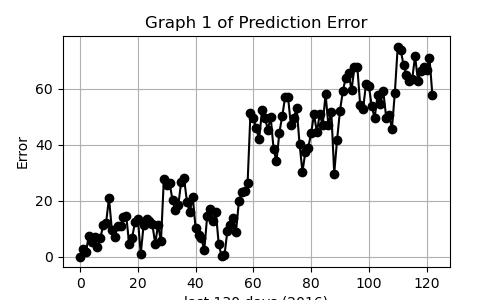

In [116]:
plt.figure(figsize = (5,3))
df['Prediction_1 Error'].plot(marker='o',color='black')
plt.grid()
plt.xlabel('last 130 days (2016)')
plt.ylabel('Error')
plt.title("Graph 1 of Prediction Error")
plt.show()


<IPython.core.display.Javascript object>


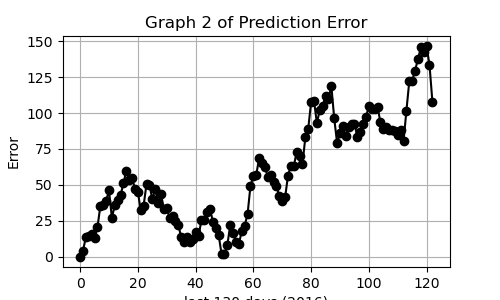

In [117]:
plt.figure(figsize = (5,3))

df['Prediction_2 Error'].plot(marker='o',color='black')

plt.grid()
plt.xlabel('last 130 days (2016)')
plt.ylabel('Error')
plt.title("Graph 2 of Prediction Error")
plt.show()


# Final conclusion :
#### Adidas share price dosent follow a GBM according to the model. 

In [43]:
pip install qfin








Note: you may need to restart the kernel to use updated packages.


In [122]:
from qfin.simulations import GeometricBrownianMotion
# 100 - initial underlying asset price
# 0 - underlying asset drift (mu)
# .3 - underlying asset volatility
# 1/52 - time steps (dt)
# 1 - time to maturity (annum)
gbm = GeometricBrownianMotion(79.457558, 0.003320045478092302
, 0.016442278782014447
, 1, 128)

In [123]:
print(gbm.simulated_path)

[80.855157530469, 81.90763002637105, 79.49911352570858, 78.96605120641752, 78.26253356231508, 79.41743053051866, 79.91575249989799, 80.68226451066057, 80.80863747220421, 79.35709143055627, 77.49503741701041, 78.68852237052867, 78.56956473634915, 78.3349756354246, 81.38137654229931, 82.13498591912398, 81.40011088534122, 81.9714474166735, 81.30852345446728, 82.68318662107772, 83.60780211853003, 85.94703494325076, 86.93879589186784, 85.12319514732714, 85.08488411866252, 85.55650287590754, 88.66476151521154, 90.29438274084285, 87.69665148642903, 87.65199906982583, 84.7881748112542, 85.12769834698058, 82.88982332497315, 83.73174202718002, 82.50039614043023, 82.28616430508417, 82.06842612452544, 83.1961150100882, 84.45574378137684, 84.27406273744258, 86.4878802662751, 88.80700401203097, 88.79558252316129, 90.02749887021248, 92.63652243709056, 94.729114037837, 94.40925499747567, 95.757052171648, 95.54625586906117, 96.17495653866482, 98.12502514553444, 102.62282140786701, 101.66827071138908, 1

### we assume that addidas share price follows a GBM , and the option contract is a european call contract 
#### Amsterdam Listed Stock Options 
#### CONTRACT SIZE	: One option normally equals rights over 100 underlying shares.
#### PRICING UNIT/QUOTATION	 : Euros per share
#### OPTION STYLE	: European style Holders of long positions are entitled to exercise their options on the expiration date. 
#### DATE OF EXPIRATION	: 1/07/2021


In [1]:
## Valuation via monte carlo simulation :
from qfin.simulations import MonteCarloCall
# 250.0 - strike price
# 100 - number of simulated price paths
# -0.2% - risk free rate of interest
# 294.7811584472656 - initial underlying asset price
# 0.0012127181707233025 - underlying asset drift (mu)
# 0.018529348188129437 - underlying asset volatility
# 128 - time steps (dt)
# .5- time to maturity (annum)
call_option = MonteCarloCall(250.0, 1000, -.002, 294.7811584472656, 0.0012127181707233025, 0.018529348188129437, 128,.5)

In [2]:
print(call_option.price)

90.91652638662163


# Chooser option valuation via Black-Scholes (BS) model  :

#### Computing an exotic option that allow the holder decide the option will be a call or put option at some predetermined future date.In a simple case, both put and call option are plain vanilla option.The value of the simple chooser option is \eqn{\max{C(S,K,t_1),P(S,K,t_2)}}.


In [179]:
Parameters

S: Current stock price

X: Strike price of the asset

r: Risk-free rate

sigma: Volatility

T: Time until maturity

d: Continuous dividend rate (default is d=0%)

SyntaxError: invalid syntax (<ipython-input-179-e8e1eb0507c1>, line 3)

In [180]:
def __init__(self, S, X, r, sigma, t1, T, d = 0):
        self.S = S
        self.X = X
        self.r = r
        self.sigma = sigma
        self.t1 = t1
        self.T = T
        self.d = d
    

In [181]:
def BlackScholes(self):
        # For call
        d1_C = (self.r - self.d + 0.5*(self.sigma**2)*self.T) / (self.sigma * np.sqrt(self.T))
        d2_C = d1_C - self.sigma*np.sqrt(self.T)
        # For put
        d1_P = (np.log(self.S/(self.X*np.exp(-self.d))) + (self.r-self.d+0.5*(self.sigma**2))*self.t1) / (self.sigma*np.sqrt(self.t1))
        d2_P = d1_P - self.sigma*np.sqrt(self.t1)

        Euro_C = self.S*np.exp(-self.d*self.T)*norm.cdf(d1_C) - self.X*np.exp(-self.r*self.T)*norm.cdf(d2_C)
        Euro_P = self.X*np.exp(-self.d)*np.exp(-self.r*self.t1)*norm.cdf(-d2_P) - self.S*np.exp(-self.d*self.t1)*norm.cdf(-d1_P)
        return Euro_C + np.exp(-self.d*(self.T-self.t1)) * Euro_P

In [168]:
############################################################################